# Fashion MNIST Classification with TensorFlow and Keras

In this notebook, I build and train a deep learning model to classify images from the Fashion MNIST dataset. The notebook is organized as follows:

1. **Data Loading and Preprocessing:** Import libraries, load the dataset, and prepare the data.
2. **Data Visualization:** Explore the dataset by visualizing some images along with their labels.
3. **Model Building:** Create a neural network using Keras.
4. **Training the Model:** Train the model and monitor its performance.
5. **Evaluating and Making Predictions:** Evaluate the model on test data and make predictions on new images.


In [1]:
# Import required libraries for building and visualizing the model
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Loading and Preprocessing

I load the Fashion MNIST dataset, which includes 70,000 grayscale images of clothing items. The dataset is divided into a training set and a test set. I then split the training set further into training and validation sets, and normalize the pixel values to be between 0 and 1.


In [2]:
# Load the Fashion MNIST dataset which contains 70,000 grayscale images of clothing items
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data() # The dataset is split into a training set and a test set

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train_full.shape

(60000, 28, 28)

In [40]:
x_test.shape

(10000, 28, 28)

In [5]:
# Split the full training set into a validation set and a (smaller) training set
# Also, normalize the pixel values to be between 0 and 1 by dividing by 255
x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.

## 2. Data Visualization

Before building the model, it's helpful to visualize the data. First, I display a single image from the training set. Then, I create a grid of images with their corresponding class names to get an overview of the dataset.


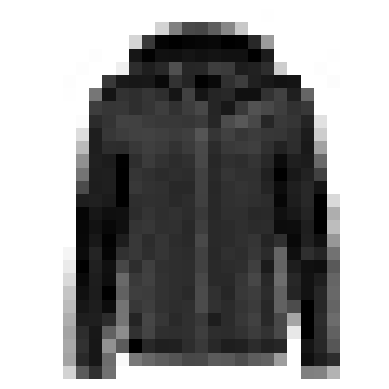

In [7]:
# Visualize the first training image to see what the data looks like
plt.imshow(x_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
# Define the class names corresponding to the labels in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

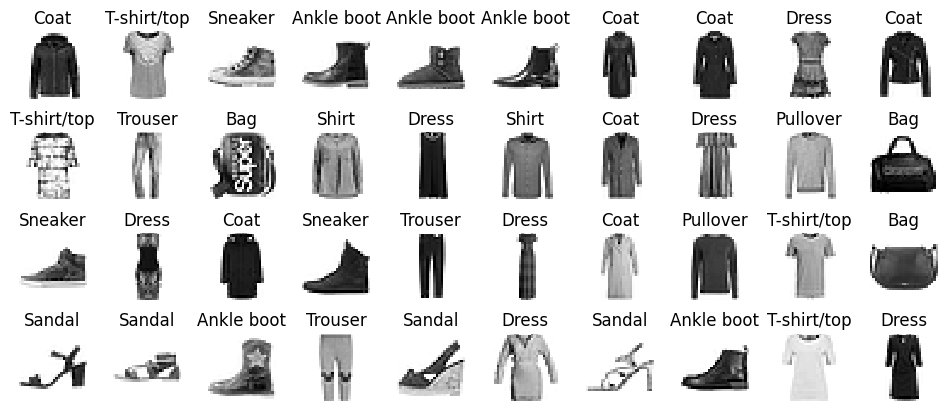

In [10]:
# Creating a grid of images to get an overview of the training data and its labels
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        # Displaying the corresponding class name as the title of each subplot
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 3. Building the Neural Network Model

I construct a simple feed-forward neural network using Keras' Sequential API. The network consists of:
- A **Flatten** layer to convert each 28x28 image into a 784-dimensional vector.
- Two **Dense** layers (with 300 and 100 neurons respectively) using the ReLU activation function.
- An output **Dense** layer with 10 neurons and a softmax activation to generate probability scores for each of the 10 classes.


In [11]:
# Building a Sequential neural network model
model = keras.models.Sequential()
# Flatten layer to convert each 28x28 image into a 1D vector of 784 pixels
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# First hidden layer with 300 neurons and ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))
# Second hidden layer with 100 neurons and ReLU activation function
model.add(keras.layers.Dense(100, activation="relu"))
# Output layer with 10 neurons (one for each class) and softmax activation to get probability distribution
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Clearing any previous TensorFlow session (good practice when building models interactively)
keras.backend.clear_session()
# Setting random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
# Print the model's layers
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
# Print the model's summary of its architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

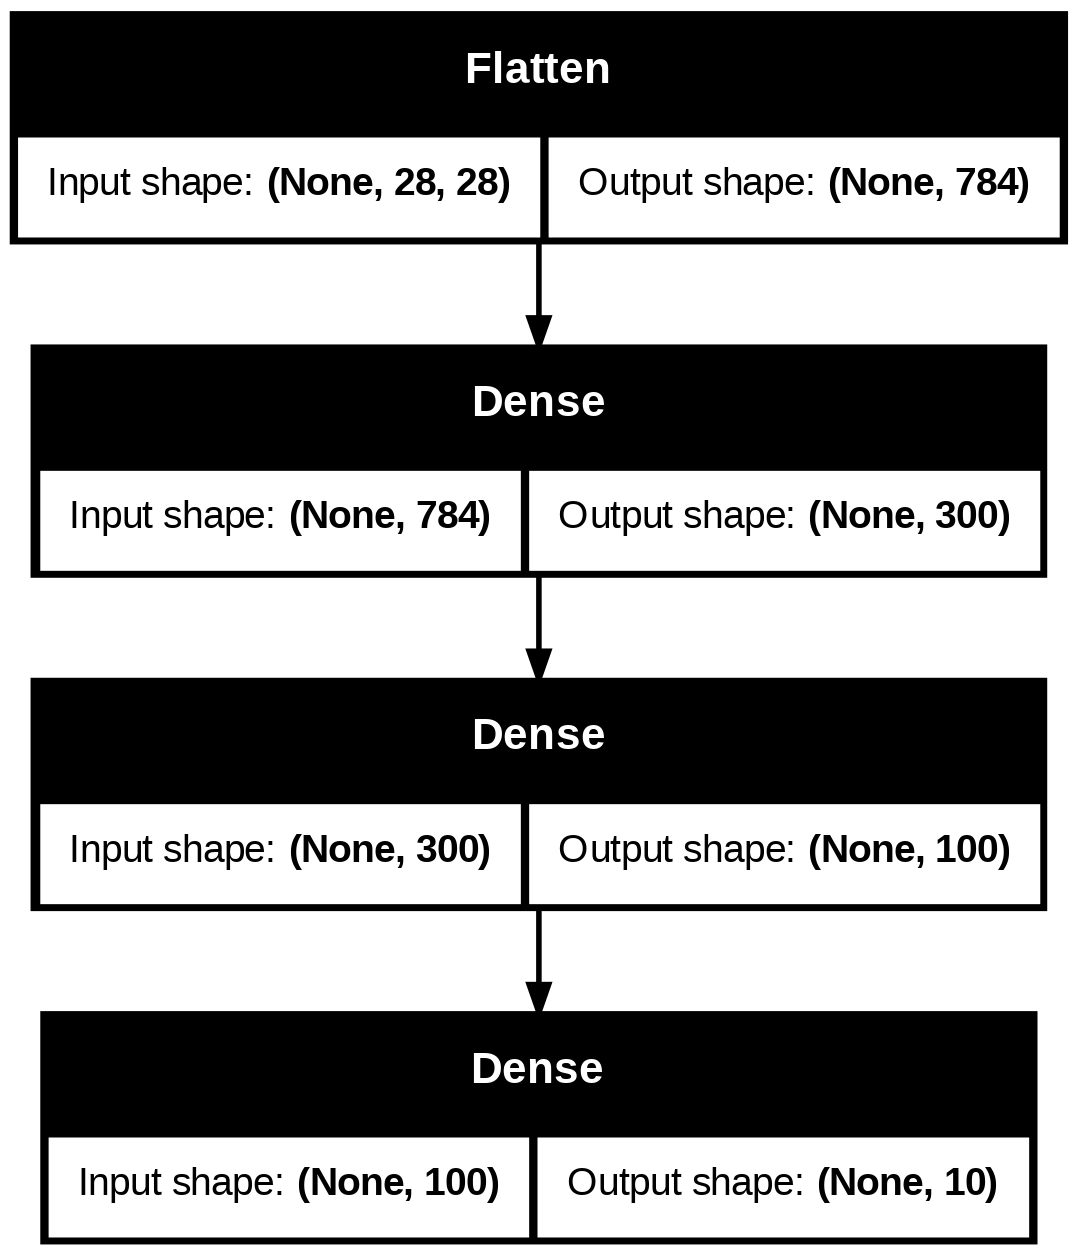

In [15]:
# Create and save a visual diagram of the model architecture (saved as "my_fashion_mnist_model.png")
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [16]:
# Accessing the first hidden layer (index 1) to explore its properties
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
# Verify that retrieving the layer by name returns the same layer instance
model.get_layer(hidden1.name) is hidden1

True

In [18]:
# Retrieve the weights and biases of the first hidden layer
weights, biases = hidden1.get_weights()

In [19]:
# First hidden layer weights
weights

array([[ 0.0462379 ,  0.05664694,  0.03565328, ...,  0.04061729,
        -0.07362602,  0.0730451 ],
       [ 0.01837101,  0.02070173,  0.01516934, ...,  0.02686942,
        -0.04247757,  0.00854623],
       [-0.05561291,  0.07032423,  0.01820216, ..., -0.02158379,
        -0.06439196, -0.00167648],
       ...,
       [-0.06580185, -0.01869731, -0.02861293, ..., -0.01719964,
         0.03030622, -0.05099667],
       [ 0.00698487,  0.06668402,  0.01524242, ..., -0.01689591,
         0.01483487,  0.05213244],
       [ 0.04484021, -0.02432692,  0.05743007, ...,  0.03772558,
        -0.0157055 , -0.05248775]], dtype=float32)

In [20]:
# First hidden layer weights shape
weights.shape

(784, 300)

In [21]:
# First hidden layer biases
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
# First hidden layer biases shape
biases.shape

(300,)

## 4. Training the Model

I compile the model using the sparse categorical crossentropy loss function (ideal for integer labels) and stochastic gradient descent (SGD) as the optimizer. Then, I train the model for 30 epochs, using the validation set to monitor performance during training.


In [23]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",  # Loss function: sparse_categorical_crossentropy (suitable for integer labels)
              optimizer="sgd",  # Optimizer: stochastic gradient descent (sgd)
              metrics=["accuracy"]) # Metrics: accuracy (to monitor the performance during training)

In [26]:
# Training the model for 30 epochs using the training set, while validating on the validation set
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6889 - loss: 0.9845 - val_accuracy: 0.8268 - val_loss: 0.5093
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8270 - loss: 0.4964 - val_accuracy: 0.8446 - val_loss: 0.4501
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8437 - loss: 0.4458 - val_accuracy: 0.8568 - val_loss: 0.4207
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8543 - loss: 0.4168 - val_accuracy: 0.8628 - val_loss: 0.4014
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8613 - loss: 0.3957 - val_accuracy: 0.8658 - val_loss: 0.3883
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8656 - loss: 0.3795 - val_accuracy: 0.8688 - val_loss: 0.3774
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8700 - loss: 0.3658 - val_accuracy: 0.8704 - val_loss: 0.3676
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8734 - loss: 0.354

In [27]:
# Print out the training parameters for reference
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [28]:
# Print out the training epochs for reference
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [29]:
# Retrieving the keys from the history object, which represent the recorded metrics
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Visualizing Training History

I use Pandas to plot the training and validation metrics over the epochs to better understand how the model's performance evolves.


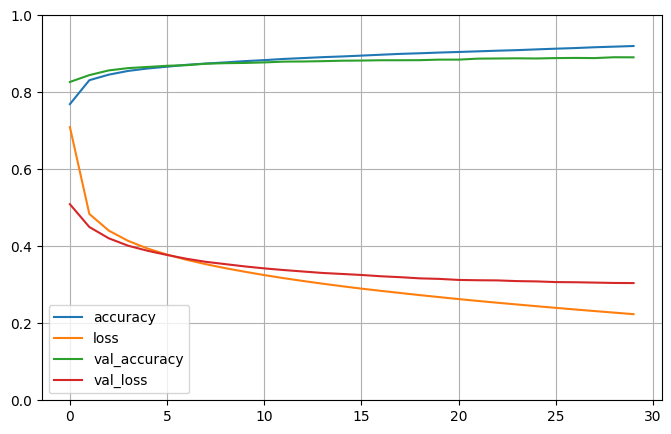

In [30]:
# Ploting the training and validation metrics (accuracy and loss) over epochs using Pandas
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 5. Evaluating the Model and Making Predictions

After training, I evaluate the model on the test set. I then select a few test images, display them, and use the trained model to predict their classes. The predictions are compared with the true labels.


In [32]:
# Evaluating the model's performance on the test set and print the results
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8759 - loss: 0.3515


[0.3487451672554016, 0.8770999908447266]

In [33]:
# Selecting a few new images from the test set to demonstrate predictions
x_new = x_test[:3]

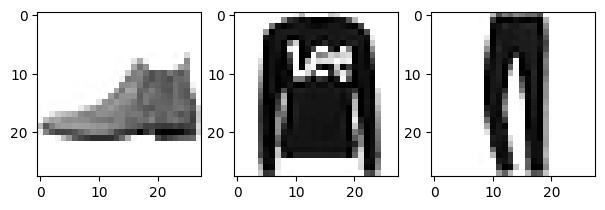

In [35]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [36]:
# Predicting the class for the selected test images
# Note: `predict_classes` is deprecated, so we use `np.argmax` to find the class with the highest probability
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(x_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
# Get the true class labels for these images
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

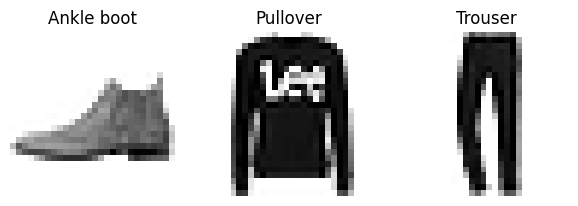

In [39]:
# Displaying the test images along with their true class names for comparison
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Summary

In this notebook, I:
- Loaded and preprocessed the Fashion MNIST dataset.
- Visualized the dataset to get a better understanding of the data.
- Built a neural network model using TensorFlow and Keras.
- Trained the model for 30 epochs while monitoring its performance on a validation set.
- Evaluated the model on unseen test data.

During the evaluation step, the model achieved a test accuracy of approximately **87.7%** (with a test loss of ~0.3487), demonstrating that it generalizes well to new data. Additionally, I made predictions on a few test images and compared them with the true labels.

This end-to-end example is a great starting point for anyone looking to learn about deep learning for image classification, providing insights into data preparation, model construction, training dynamics, and performance evaluation.
